In [ ]:
# # Stable Baselines only supports tensorflow 1.x for now
# %tensorflow_version 1.x
# !apt install swig cmake libopenmpi-dev zlib1g-dev
# !pip install stable-baselines[mpi]==2.10.0 box2d box2d-kengz
!pip install stable_baselines3

     |████████████████████████████████| 133kB 9.3MB/s 


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
!ls /gdrive

Mounted at /gdrive
'My Drive'


In [ ]:
### Set the right directory
### Must change to right directory to run!
%cd /gdrive/My\ Drive/Colab\ Notebooks/RL/citylearn/CityLearn

/gdrive/My Drive/Colab Notebooks/RL/citylearn/CityLearn


In [ ]:
import os
import gym
import numpy as np
#from stable_baselines4.stable_baselines4.sac import SAC
from stable_baselines3.sac.policies import MlpPolicy as MlpPolicy_SAC
from citylearn import  CityLearn
import matplotlib.pyplot as plt
from pathlib import Path
import time
# from stable_baselines.common.callbacks import BaseCallback
# from stable_baselines.bench import Monitor
# from stable_baselines.results_plotter import load_results, ts2xy
import pandas as pd
import seaborn as sns

In [ ]:
### Move into the folder with stable baselines fixed
%cd stable_baselines4/stable_baselines4/sac
from sac import SAC
%cd /gdrive/My\ Drive/Colab\ Notebooks/RL/citylearn/CityLearn

/gdrive/My Drive/Colab Notebooks/RL/citylearn/CityLearn/stable_baselines4/stable_baselines4/sac
/gdrive/My Drive/Colab Notebooks/RL/citylearn/CityLearn


In [ ]:
# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
# Central agent controlling one of the buildings using the OpenAI Stable Baselines
climate_zone = 2
data_path = Path("data/Climate_Zone_"+str(climate_zone))
building_attributes = data_path / 'building_attributes.json'
weather_file = data_path / 'weather_data.csv'
solar_profile = data_path / 'solar_generation_1kW.csv'
building_state_actions = 'buildings_state_action_space.json'
building_ids = ['Building_5','Building_1']
objective_function = ['ramping','1-load_factor','average_daily_peak','peak_demand','net_electricity_consumption','quadratic']
### I have made change in citylearn.py
### I made the change that when reward is NONE it will use power of 1 reward function
### if reward is given 2 then it will use power of 2 reward function
### if reward is given 3 then it will use power of 3 reward function
env = CityLearn(data_path, building_attributes, weather_file, solar_profile, \
                building_ids, buildings_states_actions = building_state_actions,\
                cost_function = objective_function, central_agent = True, \
                verbose = 1, reward = None)

In [ ]:
### stable baseline look at epoch
model = SAC(MlpPolicy_SAC, env, verbose=0, learning_rate=0.001, gamma=0.99, \
tau=3e-4, batch_size=2048, learning_starts=8759, gradient_steps =30, \
n_episodes_rollout =1, train_freq = -1)
start = time.time()

model.learn(total_timesteps=8760*10, log_interval=1000)
print(time.time()-start)

obs = env.reset()
dones = False
counter = []
while dones==False:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    counter.append(rewards)
cost_2 = env.cost().copy()
# cost_2['reward_function'] = "power_one"
# cost_2['epoch'] = epoch
# cost_2
# overall_cost.append(cost_2)

test
Cumulated reward: -468389.94919999875
Cumulated reward: -468646.5074999985
attention
Cumulated reward: -470987.5514999996
attention
Cumulated reward: -469317.25709999946
attention
Cumulated reward: -469056.5346000009
attention
Cumulated reward: -464549.18379999965
attention
Cumulated reward: -469029.494300001
attention
Cumulated reward: -467730.75830000115
attention
Cumulated reward: -469178.34869999636
attention
Cumulated reward: -465254.7842000026
attention
Cumulated reward: -467472.16879999987
attention
90.42681360244751
Cumulated reward: -467053.25950000045


In [ ]:
env.cost()

{'1-load_factor': 1.178951886408456,
 'average_daily_peak': 1.3967104,
 'net_electricity_consumption': 1.0273169,
 'peak_demand': 1.2823564,
 'quadratic': 1.2494538,
 'ramping': 2.667768,
 'total': 1.467092896023215}

In [ ]:
# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
# Central agent controlling one of the buildings using the OpenAI Stable Baselines
climate_zone = 1
data_path = Path("data/Climate_Zone_"+str(climate_zone))
building_attributes = data_path / 'building_attributes.json'
weather_file = data_path / 'weather_data.csv'
solar_profile = data_path / 'solar_generation_1kW.csv'
building_state_actions = 'buildings_state_action_space.json'
building_ids = ['Building_3']
objective_function = ['ramping','1-load_factor','average_daily_peak','peak_demand','net_electricity_consumption','quadratic']
env = CityLearn(data_path, building_attributes, weather_file, solar_profile, \
                building_ids, buildings_states_actions = building_state_actions,\
                cost_function = objective_function, central_agent = True, \
                verbose = 1, reward = 2)

In [ ]:
model = SAC(MlpPolicy_SAC, env, verbose=0, learning_rate=0.01, gamma=0.99, tau=3e-4, batch_size=2048, learning_starts=8759)
start = time.time()
# Create the callback: check every 1000 steps
#callback = SaveOnBestTrainingRewardCallback(check_freq=8760, log_dir=log_dir)
for epoch in range(10):
  #model = SAC(MlpPolicy_SAC, env, verbose=0, learning_rate=0.01, gamma=0.99, tau=3e-4, batch_size=2048, learning_starts=8759)
  model.learn(total_timesteps=8760*(epoch+1), log_interval=1000)
  print(time.time()-start)

  obs = env.reset()
  dones = False
  counter = []
  while dones==False:
      action, _states = model.predict(obs)
      obs, rewards, dones, info = env.step(action)
      counter.append(rewards)
  cost_2 = env.cost().copy()
  cost_2['reward_function'] = "power_two"
  cost_2['epoch'] = epoch
  cost_2
  overall_cost.append(cost_2)

Cumulated reward: 7430217.01104526
1.895461082458496
Cumulated reward: 6707529.359977911
Cumulated reward: 7470948.462544478
Cumulated reward: 6704014.105857961
108.08804655075073
Cumulated reward: 6697894.042252019
Cumulated reward: 7612527.007472604
Cumulated reward: 6697894.042252019
Cumulated reward: 6697894.042252019
308.0251214504242
Cumulated reward: 6697894.042252019
Cumulated reward: 7439239.813520157
Cumulated reward: 6697894.042252019
Cumulated reward: 6697894.042252019
Cumulated reward: 6697894.042252019
604.672529220581
Cumulated reward: 6697894.042252019
Cumulated reward: 7466246.341562913
Cumulated reward: 6697894.042252019
Cumulated reward: 6697894.042252019
Cumulated reward: 6697894.042252019
Cumulated reward: 6697894.042252019
996.4158236980438
Cumulated reward: 6697894.042252019
Cumulated reward: 7473479.441941804
Cumulated reward: 6697894.042252019
Cumulated reward: 6697894.042252019
Cumulated reward: 6697894.042252019
Cumulated reward: 6697894.042252019
Cumulated r

In [ ]:
# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
# Central agent controlling one of the buildings using the OpenAI Stable Baselines
climate_zone = 1
data_path = Path("data/Climate_Zone_"+str(climate_zone))
building_attributes = data_path / 'building_attributes.json'
weather_file = data_path / 'weather_data.csv'
solar_profile = data_path / 'solar_generation_1kW.csv'
building_state_actions = 'buildings_state_action_space.json'
building_ids = ['Building_3']
objective_function = ['ramping','1-load_factor','average_daily_peak','peak_demand','net_electricity_consumption','quadratic']
env = CityLearn(data_path, building_attributes, weather_file, solar_profile, \
                building_ids, buildings_states_actions = building_state_actions,\
                cost_function = objective_function, central_agent = True, \
                verbose = 1, reward = 3)

In [ ]:
model = SAC(MlpPolicy_SAC, env, verbose=0, learning_rate=0.01, gamma=0.99, tau=3e-4, batch_size=2048, learning_starts=8759)
start = time.time()
# Create the callback: check every 1000 steps
#callback = SaveOnBestTrainingRewardCallback(check_freq=8760, log_dir=log_dir)
for epoch in range(10):
  #model = SAC(MlpPolicy_SAC, env, verbose=0, learning_rate=0.01, gamma=0.99, tau=3e-4, batch_size=2048, learning_starts=8759)
  model.learn(total_timesteps=8760*(epoch+1), log_interval=1000)
  print(time.time()-start)

  obs = env.reset()
  dones = False
  counter = []
  while dones==False:
      action, _states = model.predict(obs)
      obs, rewards, dones, info = env.step(action)
      counter.append(rewards)
  cost_2 = env.cost().copy()
  cost_2['reward_function'] = "power_three"
  cost_2['epoch'] = epoch
  cost_2
  overall_cost.append(cost_2)

Cumulated reward: -501851478.109692
1.852820634841919
Cumulated reward: -581172180.5240219
Cumulated reward: -512941129.5827006
Cumulated reward: -352396725.2756428
102.66050291061401
Cumulated reward: -374101933.5055459
Cumulated reward: -509453287.37621707
Cumulated reward: -374101933.5055459
Cumulated reward: -374101933.5055459
296.4577827453613
Cumulated reward: -374101933.5055459
Cumulated reward: -521987472.64411575
Cumulated reward: -374101933.5055459
Cumulated reward: -374101933.5055459
Cumulated reward: -374101933.5055459
589.3361418247223
Cumulated reward: -374101933.5055459
Cumulated reward: -512659146.1919393
Cumulated reward: -374101933.5055459
Cumulated reward: -374101933.5055459
Cumulated reward: -374101933.5055459
Cumulated reward: -374101933.5055459
970.5197470188141
Cumulated reward: -374101933.5055459
Cumulated reward: -524137020.95515627
Cumulated reward: -374101933.5055459
Cumulated reward: -374101933.5055459
Cumulated reward: -374101933.5055459
Cumulated reward: -

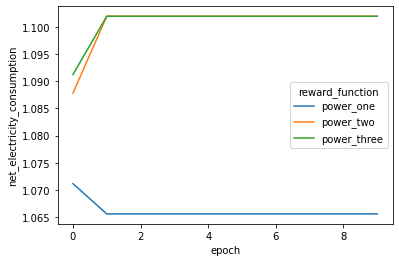

In [ ]:
df = pd.DataFrame(overall_cost)
sns.lineplot(data=df, x="epoch", y="net_electricity_consumption", hue="reward_function")

In [ ]:
df

,ramping,1-load_factor,average_daily_peak,peak_demand,net_electricity_consumption,quadratic,total,reward_function,epoch
0,2.042840,1.235910,1.797923,1.193723,1.071135,1.774638,1.519362,power_one,0
1,1.107599,1.103773,1.227806,1.168107,1.065558,1.431723,1.184094,power_one,1
2,1.107599,1.103773,1.227806,1.168107,1.065558,1.431723,1.184094,power_one,2
3,1.107599,1.103773,1.227806,1.168107,1.065558,1.431723,1.184094,power_one,3
4,1.107599,1.103773,1.227806,1.168107,1.065558,1.431723,1.184094,power_one,4
5,1.107599,1.103773,1.227806,1.168107,1.065558,1.431723,1.184094,power_one,5
6,1.107599,1.103773,1.227806,1.168107,1.065558,1.431723,1.184094,power_one,6
7,1.107599,1.103773,1.227806,1.168107,1.065558,1.431723,1.184094,power_one,7
8,1.107599,1.103773,1.227806,1.168107,1.065558,1.431723,1.184094,power_one,8
9,1.107599,1.103773,1.227806,1.168107,1.065558,1.431723,1.184094,power_one,9
